In [4]:
import sys
sys.path.append("../")

from utils import *
from experiment import unpack_and_dequantize
from tqdm.auto import tqdm
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [5]:
with open("../lambda_bifurcation_dominant_frequencies_amplitudes.pickle", 'rb') as f:
    amps = pickle.load(f)
amps = [np.mean(x["amplitudes"]) for x in amps]

In [6]:
D = "lambda_bifurcation"
results = {}
sen = {}

for idx, file in enumerate(tqdm(os.listdir("../"+D))):
    with open(os.path.join("../"+D, file), "rb") as f:
        res = pickle.load(f)
    P = res["params"]
    L = P["lambda"]
    w = unpack_and_dequantize(res["wealth"][:,-1], 200)
    h = unpack_and_dequantize(res["health"][:,-1], 200)
    S = sen_welfare(utility(w, h, P["alpha"]))
    if L not in results:
        results[L] = [amps[idx]]
        sen[L] = [S]
    else:
        results[L].append(amps[idx])
        sen[L].append(S)

  0%|          | 0/1764 [00:00<?, ?it/s]

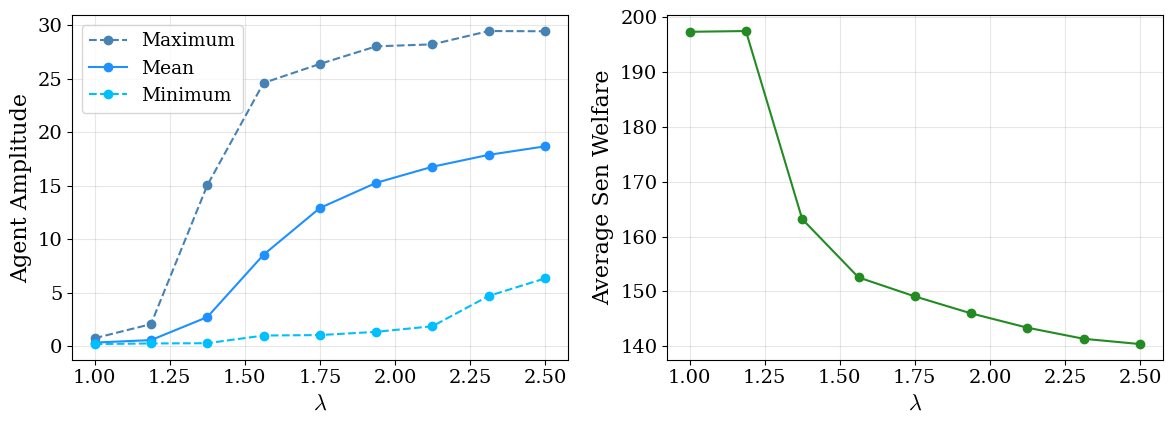

In [22]:
sorted_lambda_vals = sorted(list(results.keys()))
fig, axs = plt.subplots(1, 2, figsize=(12,4.5))

axs[0].plot(
    sorted_lambda_vals,
    [np.max(results[l]) for l in sorted_lambda_vals],
    color="steelblue",
    label="Maximum",
    linestyle="dashed",
    marker='o'
)
axs[0].plot(
    sorted_lambda_vals,
    [np.mean(results[l]) for l in sorted_lambda_vals],
    color="dodgerblue",
    marker='o',
    label="Mean"
)
axs[0].plot(
    sorted_lambda_vals,
    [np.min(results[l]) for l in sorted_lambda_vals],
    color="deepskyblue",
    label="Minimum",
    linestyle="dashed",
    marker='o'
)
axs[0].set_xlabel(r"$\lambda$")
axs[0].set_ylabel("Agent Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].plot(
    sorted_lambda_vals,
    [np.mean(sen[l]) for l in sorted_lambda_vals],
    color="forestgreen",
    marker='o',
    label="Average Sen Welfare"
)
axs[1].set_ylabel("Average Sen Welfare")
axs[1].set_xlabel(r"$\lambda$")
axs[1].grid()

fig.tight_layout()
plt.savefig("../figures/lambda_bifurcation.pdf", bbox_inches="tight")
plt.show()